In [2]:
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import tensorflow as tf

**Dataset**

(60000, 28, 28)
3


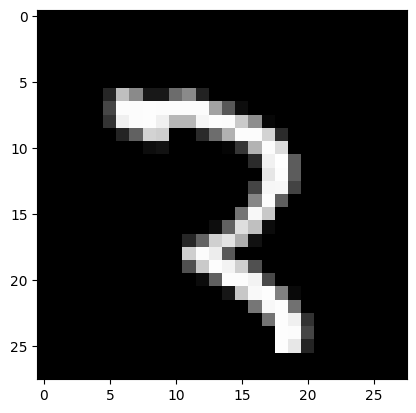

In [14]:
# ترین کردن یه مدل با شبکه عصبی سی ان ان

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)

image = plt.imshow(x_train[500], cmap='gray')
print(y_train[500])

**Preproccesing**

In [15]:
# پیش پردازش

# نرمالایز
# برای سی ان ان، شیپ تصویر حتما باید دارای عمق تصویر هم باشه
# به جای ابعاد ریشیپ، باید ابعاد تصویر و تعداد کانال های رنگی رو بزاریم
x_train = x_train.reshape((-1, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((-1, 28, 28, 1)).astype('float32') / 255

x_train.shape

(60000, 28, 28, 1)

**Model definition**

In [21]:
# ساخت شبکه عصبی

# تعریف مدل
model = keras.Sequential()

# تعریف لایه ها

model.add(keras.layers.Input(shape=(28, 28, 1))) # لایه ورودی

model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='valid')) # لایه کانولوشن
model.add(keras.layers.BatchNormalization()) # لایه بچ نرمالیزیشن برای نرمالایز کردن مقادیر فیچر مپ
# اکتیویشن لایه اول کانولوشن رو اینجا مینویسیم چون بهتره بچ نرمالیزیشن قبل از اکتیویشن انجام بشه
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))) # پولینگ

model.add(keras.layers.Conv2D(filters=32, kernel_size=(5, 5), strides=(2, 2), padding='same', activation='relu')) # لایه دوم کانولوشن
model.add(keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))) # پولینگ (توی این لایه کانولوشنی بچ نرمالیزیشن نزاشتیم)

model.add(keras.layers.Flatten()) # فلت کردن فیچر مپ

model.add(keras.layers.Dense(units=128, activation='relu')) # لایه پنهان دنس
model.add(keras.layers.Dropout(0.4)) # غیر فعال کردن نصف نورون های لایه پنهان دنس
model.add(keras.layers.Dense(units=10, activation='softmax')) # لایه خروجی

# کامپایل کردن مدل
model.compile(optimizer=tf.optimizers.Adam(), loss=tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# اطلاعات مدل
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 7, 7, 32)       │        51,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,410 (353.16 KB)

 Trainable params: 90,282 (352.66 KB)

 Non-trainable params: 128 (512.00 B)

In [17]:
# فیت کردن مدل

# تعریف کال بک
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

fitted_model = model.fit(x_train, y_train, epochs=10, batch_size=256, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.7480 - loss: 0.7553 - val_accuracy: 0.9661 - val_loss: 0.7596
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9634 - loss: 0.1148 - val_accuracy: 0.9779 - val_loss: 0.0901
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9727 - loss: 0.0876 - val_accuracy: 0.9844 - val_loss: 0.0457
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9804 - loss: 0.0620 - val_accuracy: 0.9854 - val_loss: 0.0419
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9833 - loss: 0.0514 - val_accuracy: 0.9877 - val_loss: 0.0382
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9851 - loss: 0.0490 - val_accuracy: 0.9869 - val_loss: 0.0368
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9871 - loss: 0.0409 - val_accuracy: 0.9870 - val_loss: 0.0375
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9877 - loss: 0.0373 - val_accu

**Plotting the history**

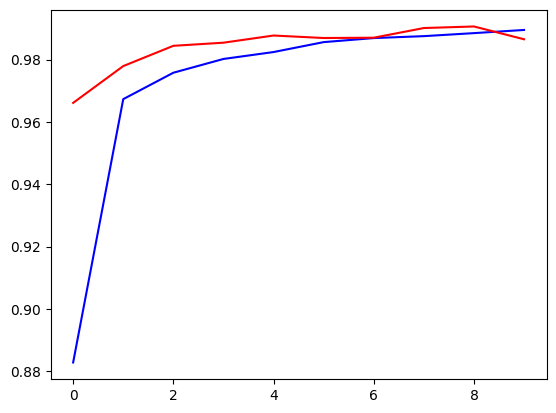

In [18]:
# نمایش نمودار تغییر اکیورسی

plt.plot(fitted_model.history['accuracy'], color='blue') # داده ترین
plt.plot(fitted_model.history['val_accuracy'], color='red') # داده تست